<a href="https://colab.research.google.com/github/gr3ybr0w/Climate_Change/blob/master/climate_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts.csv

--2019-04-26 19:26:30--  https://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts.csv
Resolving data.giss.nasa.gov (data.giss.nasa.gov)... 129.164.128.233, 2001:4d0:2310:230::233
Connecting to data.giss.nasa.gov (data.giss.nasa.gov)|129.164.128.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12339 (12K) [text/csv]
Saving to: ‘GLB.Ts.csv’

GLB.Ts.csv          100%[===================>]  12.05K  --.-KB/s    in 0s      

2019-04-26 19:26:35 (196 MB/s) - ‘GLB.Ts.csv’ saved [12339/12339]



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [0]:
data = pd.read_csv('./GLB.Ts.csv', skiprows=1)
data.drop(index=139 ,inplace=True)
data_mlt = pd.melt(data, id_vars=['Year'], value_vars=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
data_mlt['value'] = data_mlt['value'].astype(np.float32)

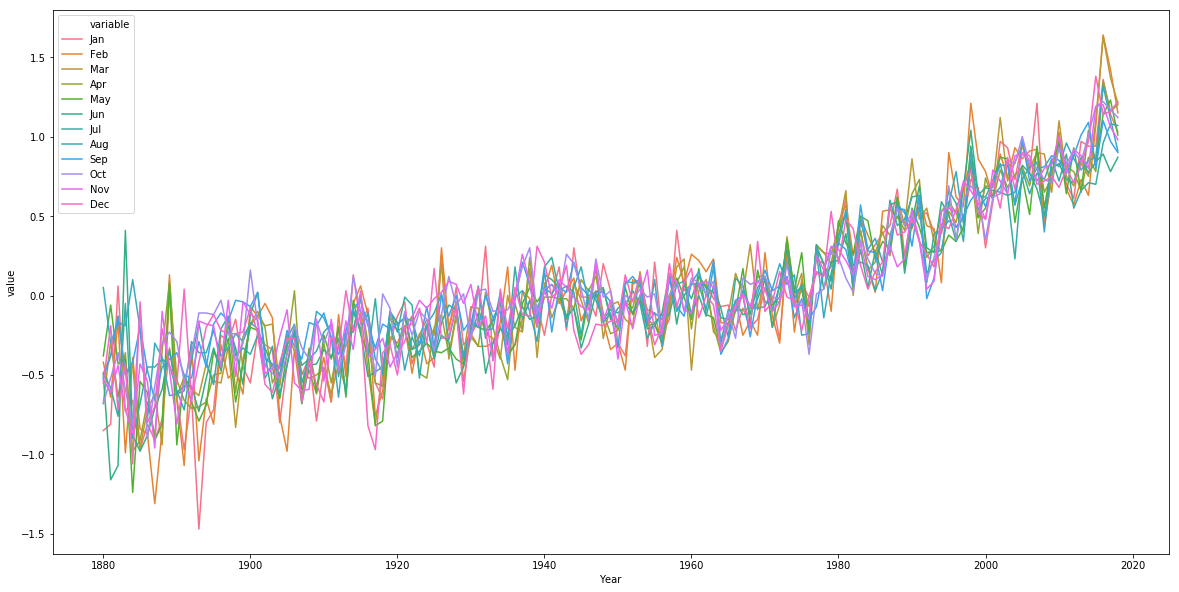

In [173]:
plt.rcParams['figure.figsize'] = [20,10]
sns.lineplot(x='Year', y='value', data=data_mlt, hue='variable');

In [0]:
data.drop(index=0, inplace=True)
data = data.astype(np.float32)

In [53]:
!wget http://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.PC?downloadformat=csv

--2019-04-26 19:55:55--  http://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.PC?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.202.61.240
Connecting to api.worldbank.org (api.worldbank.org)|52.202.61.240|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124502 (122K) [application/zip]
Saving to: ‘EN.ATM.CO2E.PC?downloadformat=csv’

EN.ATM.CO2E.PC?down 100%[===================>] 121.58K   618KB/s    in 0.2s    

2019-04-26 19:55:55 (618 KB/s) - ‘EN.ATM.CO2E.PC?downloadformat=csv’ saved [124502/124502]



In [58]:
!unzip 'EN.ATM.CO2E.PC?downloadformat=csv'

Archive:  EN.ATM.CO2E.PC?downloadformat=csv
  inflating: Metadata_Indicator_API_EN.ATM.CO2E.PC_DS2_en_csv_v2_10576797.csv  
  inflating: API_EN.ATM.CO2E.PC_DS2_en_csv_v2_10576797.csv  
  inflating: Metadata_Country_API_EN.ATM.CO2E.PC_DS2_en_csv_v2_10576797.csv  


In [176]:
co2 = pd.read_csv('./API_EN.ATM.CO2E.PC_DS2_en_csv_v2_10576797.csv', skiprows=4)
co2.drop(['Unnamed: 63'], axis=1, inplace=True)
year_cols = list(co2)[4:]
co2_mlt = pd.melt(co2, id_vars=['Country Name'], value_vars=year_cols,var_name='Year', value_name='CO2')
co2_mlt.head()

,Country Name,Year,CO2
0,Aruba,1960,NaN
1,Afghanistan,1960,0.046060
2,Angola,1960,0.097472
3,Albania,1960,1.258195
4,Andorra,1960,NaN


In [0]:
co2_mlt['CO2'] = co2_mlt.groupby(['Country Name'])['CO2'].transform(lambda x: x.fillna(x.ffill()))
co2_mlt['CO2'] = co2_mlt.groupby(['Country Name'])['CO2'].transform(lambda x: x.fillna(x.bfill()))

In [178]:
co2_mlt[co2_mlt.CO2.isna()].groupby(['Country Name']).size()

Country Name
American Samoa              59
Channel Islands             59
Guam                        59
Isle of Man                 59
Kosovo                      59
Monaco                      59
Northern Mariana Islands    59
Not classified              59
Puerto Rico                 59
San Marino                  59
St. Martin (French part)    59
Virgin Islands (U.S.)       59
dtype: int64

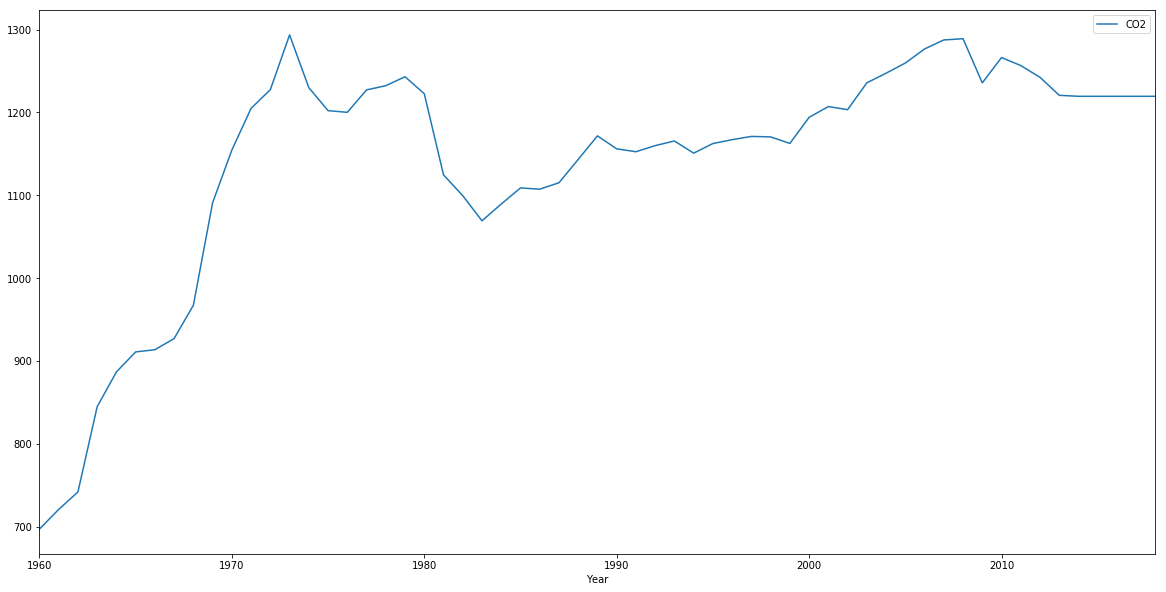

In [179]:
co2_mlt = co2_mlt[co2_mlt.CO2.notna()]
co2_mlt.groupby(['Year']).sum().plot(kind='line');

In [0]:
co2_mlt['CO2_cumsum'] = co2_mlt.groupby(['Country Name'])['CO2'].transform(lambda x: x.cumsum())

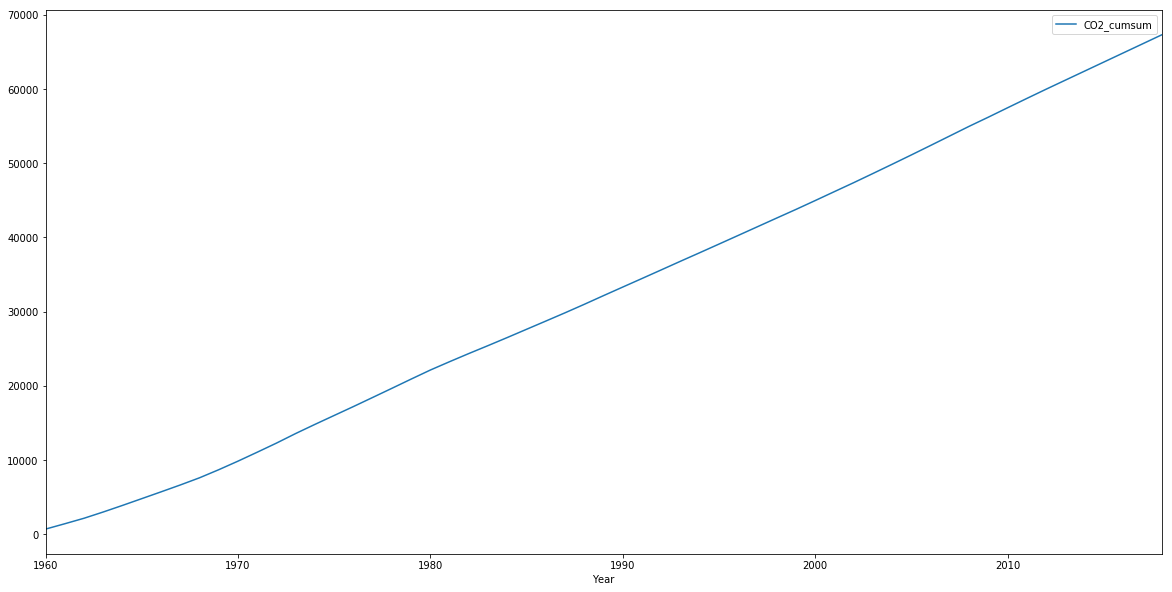

In [197]:
co2_mlt.groupby(['Year']).sum()[['CO2_cumsum']].plot(kind='line');

In [182]:
data.Year.min()

1881.0

In [0]:
co2_mlt['Year'] = co2_mlt.Year.astype(int)

In [133]:
co2_mlt.Year.min()

1960

In [0]:
temp = data[data.Year >= 1960].copy()

In [0]:
temp['overall'] = (temp.Jan + temp.Feb + temp.Mar + temp.Apr + temp.May + temp.Jun + temp.Jul + temp.Aug + temp.Sep + temp.Oct + temp.Nov + temp.Dec) / 12

In [0]:
temp['Year'] = temp.Year.astype(int)

In [201]:
temp.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,overall
80,1960,0.07,0.26,-0.47,-0.21,-0.15,-0.02,-0.12,0.07,0.08,0.11,-0.11,0.17,-0.03,-0.03,0.14,-0.28,-0.02,0.03,-0.026667
81,1961,0.08,0.22,0.03,0.12,0.17,0.12,0.00,0.07,0.15,0.08,0.07,-0.14,0.08,0.11,0.16,0.11,0.06,0.10,0.080833
82,1962,0.07,0.15,0.10,0.05,-0.12,0.05,-0.13,-0.09,0.00,0.01,0.09,0.00,0.02,0.00,0.03,0.01,-0.06,0.03,0.015000
83,1963,-0.02,0.23,-0.23,-0.19,-0.14,0.02,0.06,0.18,0.22,0.09,0.05,-0.06,0.02,0.02,0.07,-0.19,0.09,0.12,0.017500
84,1964,-0.07,-0.17,-0.28,-0.36,-0.33,-0.14,-0.08,-0.30,-0.37,-0.35,-0.22,-0.35,-0.25,-0.23,-0.10,-0.32,-0.17,-0.31,-0.251667


In [0]:
co2_year = co2_mlt.groupby(['Year'], as_index=False).sum()[['Year','CO2_cumsum']]

In [0]:
co2_temp = pd.merge(temp,  co2_year, on='Year')[['Year', 'overall','CO2_cumsum']]

In [204]:
co2_temp.corr()

,Year,overall,CO2_cumsum
Year,1.000000,0.943660,0.999624
overall,0.943660,1.000000,0.946298
CO2_cumsum,0.999624,0.946298,1.000000


In [0]:
scaler = StandardScaler()

In [206]:
scaled_data = pd.DataFrame(scaler.fit_transform(co2_temp[['overall','CO2_cumsum']]), columns=['temp_scaled','CO2_scaled'])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
d = pd.concat([co2_temp, scaled_data], axis=1)

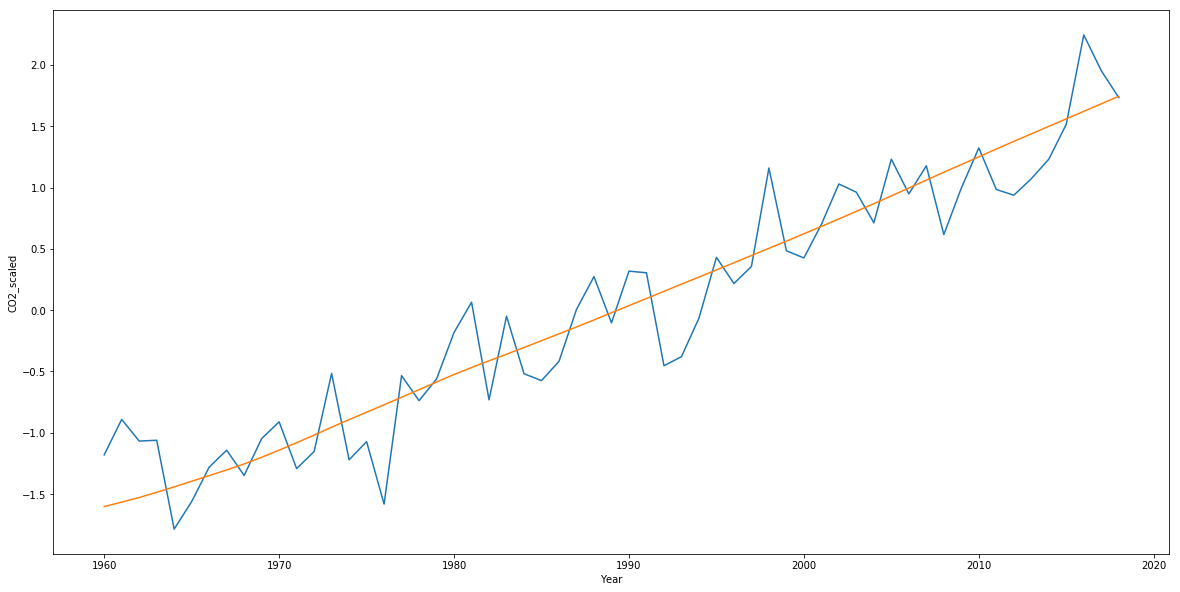

In [208]:
sns.lineplot(x='Year', y='temp_scaled', data=d)
sns.lineplot(x='Year', y='CO2_scaled', data=d);